# GOALS:
- Re-looking at the numerical ranges calculated with Kristin

In [1]:
import numpy as np
from Imports.linalg_Zpi import linalg_Zpi
from Imports.numrange_Zpi import numrange_Zpi

In [2]:
linalg = linalg_Zpi(n=2, p=7)
norm0 = np.load("Imports/norm0/p=7_n=2.npz")["norm0"]
print(norm0)

[[[0.+1.j]
  [2.+3.j]]

 [[0.+1.j]
  [2.+4.j]]

 [[0.+1.j]
  [3.+2.j]]

 [[0.+1.j]
  [3.+5.j]]

 [[0.+1.j]
  [4.+2.j]]

 [[0.+1.j]
  [4.+5.j]]

 [[0.+1.j]
  [5.+3.j]]

 [[0.+1.j]
  [5.+4.j]]]


In [3]:
vec1 = np.array([[complex(0,1)],
                 [complex(2,3)]
                ])

vec2 = np.array([[complex(0,1)],
                 [complex(2,4)]
                ])

In [4]:
vecs = (vec1, vec2)
vals=(complex(2,0),complex(3,0))

In [5]:
A_2_3 = linalg.from_eigen(vals=vals, vecs=vecs)
print(A_2_3)

[[6.+2.j 1.+0.j]
 [6.+0.j 6.+5.j]]


[6.+0.j 6.+1.j 6.+2.j 6.+3.j 6.+4.j 6.+5.j 6.+6.j]


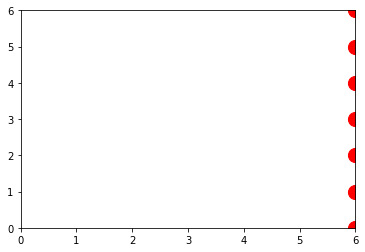

In [6]:
W_A_2_3 = numrange_Zpi(n=2, p=7, M=A_2_3)
print(W_A_2_3.W1())

Try:
- One eigenvalue 5 and one complex eigenvalue with real part 5
- Swapping the order of the eigenvalues
    - Will it transpose a vertical line to a horizontal? NO
    
    
Conjecture 1:
$W(A_{ab}) = W(A_{ba})$
- Is a direct result of there being invariance under unitary similarity
    
Conjecture 2:
- If the two eigenvalues share a real part, the resulting W1 is a horizontal line
- If the two eigenvalues share an imaginary part, the resulting W1 is a vertical line

Conjecture 3:
- Suppose $A_{ab}$ and $A_{cd}$ share 2 norm-0 eigenvectors and suppose one of the following holds:
    - $Re(a)=Re(b)=Re(c)=Re(d)$ and $Im(a)+Im(b)=Im(c)+Im(d)$ or
    - $Im(a)=Im(b)=Im(c)=Im(d)$ and $Re(a)+Re(b)=Re(c)+Re(d)$
- Then $W(A_{ab}) = W(A_{cd})$

In [7]:
np.random.seed(seed=2)

In [8]:
A_3_2 = linalg.from_eigen(vals=(3,2), vecs=vecs)
print(A_3_2)

[[6.+5.j 6.+0.j]
 [1.+0.j 6.+2.j]]


[6.+0.j 6.+1.j 6.+2.j 6.+3.j 6.+4.j 6.+5.j 6.+6.j]


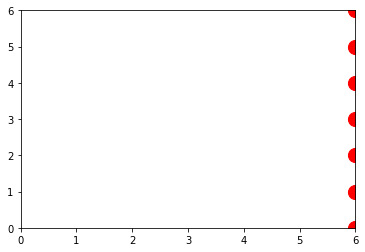

In [9]:
W_A_3_2 = numrange_Zpi(n=2, p=7, M=A_3_2)
print(W_A_3_2.W1())

In [10]:
rand = np.random.randint(0,7,(2,7))

for i in range(rand.shape[1]):
    print(linalg.from_eigen(vals=(rand[0,i], rand[1,i]), vecs=vecs))
    print(linalg.from_eigen(vals=(rand[1,i], rand[0,i]), vecs=vecs))
    print("----------")

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
----------
[[0.+1.j 4.+0.j]
 [3.+0.j 0.+6.j]]
[[0.+6.j 3.+0.j]
 [4.+0.j 0.+1.j]]
----------
[[4.+2.j 1.+0.j]
 [6.+0.j 4.+5.j]]
[[4.+5.j 6.+0.j]
 [1.+0.j 4.+2.j]]
----------
[[1.+1.j 4.+0.j]
 [3.+0.j 1.+6.j]]
[[1.+6.j 3.+0.j]
 [4.+0.j 1.+1.j]]
----------
[[4.+4.j 2.+0.j]
 [5.+0.j 4.+3.j]]
[[4.+3.j 5.+0.j]
 [2.+0.j 4.+4.j]]
----------
[[2.+0.j 0.+0.j]
 [0.+0.j 2.+0.j]]
[[2.+0.j 0.+0.j]
 [0.+0.j 2.+0.j]]
----------
[[0.+2.j 1.+0.j]
 [6.+0.j 0.+5.j]]
[[0.+5.j 6.+0.j]
 [1.+0.j 0.+2.j]]
----------


# Testing conjecture 2

In [11]:
# Stick with same eigenvectors
vals6 = (complex(6,5), complex(5,5))
vals5 = (complex(5,5), complex(4,5))
vals4 = (complex(4,5), complex(3,5))
vals3 = (complex(3,5), complex(2,5))
vals2 = (complex(2,5), complex(1,5))
vals1 = (complex(1,5), complex(0,5))
vals0 = (complex(0,5), complex(6,5))

array([0.+4.j, 1.+1.j, 2.+5.j, 3.+2.j, 4.+6.j, 5.+3.j, 6.+0.j],
      dtype=complex64)

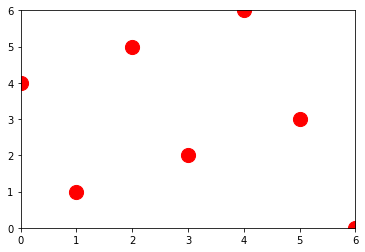

In [12]:
numrange_Zpi(n=2, p=7, M=linalg.from_eigen(vals=(complex(6,4),complex(5,6)), vecs=vecs)).W1()